In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

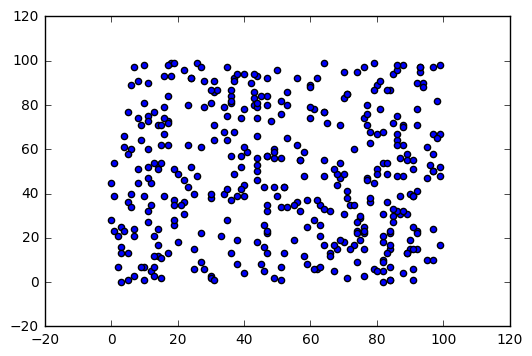

In [2]:
#set the number of clusters
num_clusters=3

# initialize a random dataset
points = np.random.randint(100, size=(400,3))
points[:, 2] = -1

#sets the colors
color_set = ['red', 'orange', 'green']

#display the data initially
plt.scatter(points[:, 0], points[:, 1])

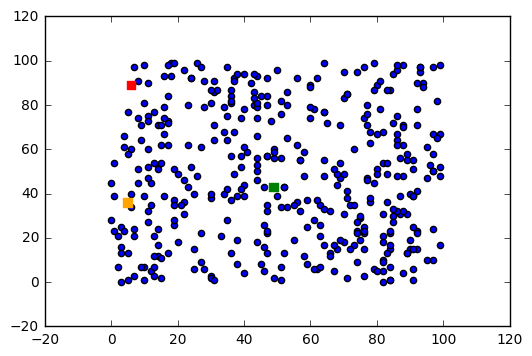

In [3]:
#generate the centroids
def initialize_centroids(dataset, num_clusters):
    choices = np.random.randint(dataset.shape[0], size=num_clusters)
    return dataset[choices, :]

centroids = initialize_centroids(points, num_clusters)
#plot the centroids in a red color
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], color=color_set, s=40, marker='s')

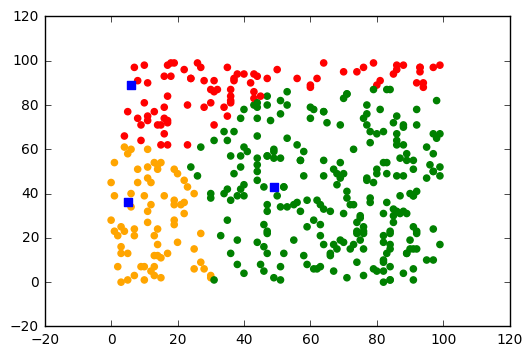

In [4]:
def closest_centroids(dataset, centroids):
    distances = np.sqrt((dataset - centroids[:, np.newaxis])**2).sum(axis=2)
    dataset[:, 2] = np.argmin(distances, axis=0)
    color_info = [color_set[i] for i in np.argmin(distances, axis=0)]
    return dataset, color_info

newpoints, ci = closest_centroids(points, centroids)
plt.scatter(points[:, 0], points[:, 1], color=ci)
plt.scatter(centroids[:, 0], centroids[:, 1], color='b', s=40, marker='s')

#here you can seee the centroids and the corresponding closest points

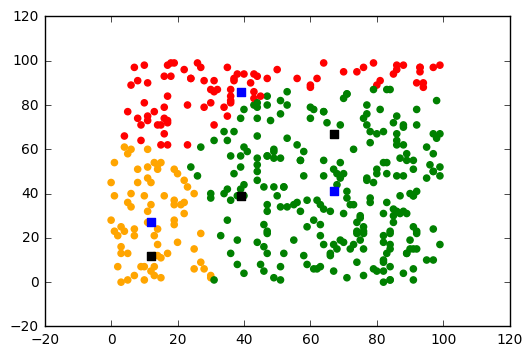

In [7]:
# now we move the centroids 
def move_centroids(dataset, centroids):
    for i in range(num_clusters):
        centroids[i, :] = (dataset[np.where(dataset[:, 2] == i)].mean(axis=0))
    return centroids
    
plt.scatter(points[:, 0], points[:, 1], color=ci)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=40, marker='s')

centroids = move_centroids(points, centroids)

plt.scatter(centroids[:, 0], centroids[:, 1], color='b', s=40, marker='s')

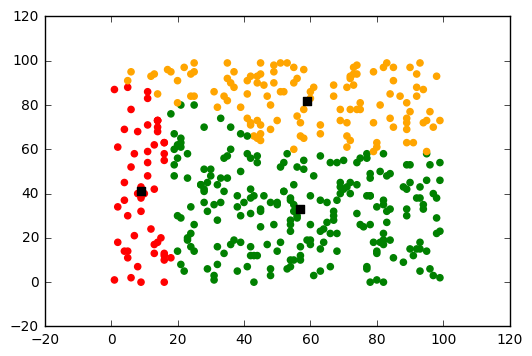

In [18]:
#putting it all together
points = np.random.randint(100, size=(400,3))
points[:, 2] = -1
oldpoints = None

centroids = initialize_centroids(points, num_clusters)

while not np.array_equal(points, oldpoints):
    temp = points
    points, ci = closest_centroids(points, centroids)
    centroids = move_centroids(points, centroids)
    oldpoints = temp
    
plt.scatter(points[:, 0], points[:, 1], color=ci)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=40, marker='s')